# Analysis

Train the various algorithms and show your results. 

You must plot the reward obtained by your agent per step and the total regret accumulated so far.

This one is an open ended assignment, so feel free to play around. Extra credit for more beautiful plots (you can check out Seaborn). 

In [44]:
import numpy as numpy
import matplotlib.pyplot as plt 
# import seaborn as sns
# import sys
# import os
# module_path = os.path.abspath(os.path.join('.'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

from bandits import Bandit
from agents import *

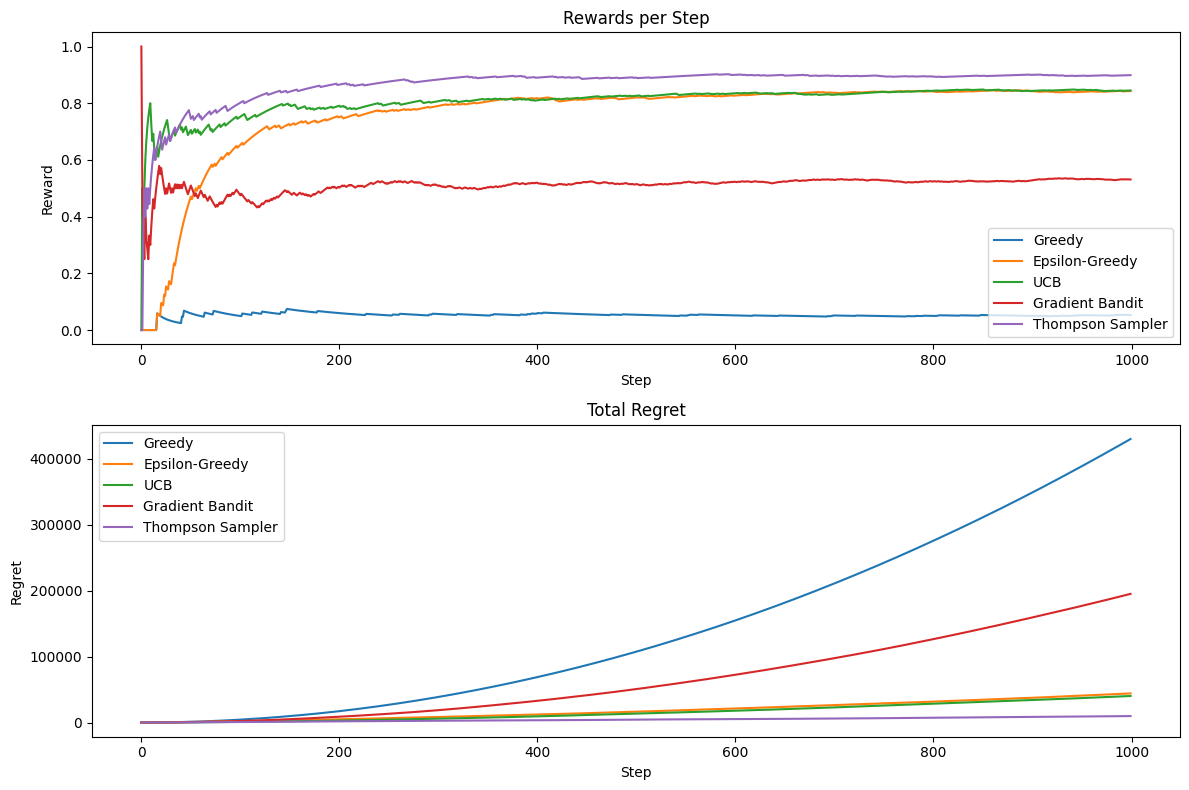

In [45]:
def train_and_evaluate(agent, bandit, num_steps):
    rewards = np.zeros(num_steps)
    regret = np.zeros(num_steps)
    sum_reward = 0

    for step in range(num_steps):
        reward = agent.act()
        sum_reward+=reward
        rewards[step] = sum_reward/(step+1)
        regret[step] = bandit.get_regret()

    bandit.reset_regret()
    #print(rewards)

    return rewards, np.cumsum(regret)

# Bandit setup
num_bandits = 5
bandit_type = "Bernoulli"
bandit = Bandit(n=num_bandits, type=bandit_type)

# Training parameters
num_steps = 1000

# Initialize agents
greedy_agent = GreedyAgent(bandit, initialQ=0)
eps_greedy_agent = epsGreedyAgent(bandit, epsilon=0.1)
ucb_agent = UCBAAgent(bandit, c=2)
gradient_bandit_agent = GradientBanditAgent(bandit, alpha=0.1)
thompson_sampler_agent = ThompsonSamplerAgent(bandit, alpha=1, beta=1)

# Train and evaluate agents
rewards_greedy, regret_greedy = train_and_evaluate(greedy_agent, bandit, num_steps)
rewards_eps_greedy, regret_eps_greedy = train_and_evaluate(eps_greedy_agent, bandit, num_steps)
rewards_ucb, regret_ucb = train_and_evaluate(ucb_agent, bandit, num_steps)
rewards_gradient_bandit, regret_gradient_bandit = train_and_evaluate(gradient_bandit_agent, bandit, num_steps)
rewards_thompson_sampler, regret_thompson_sampler = train_and_evaluate(thompson_sampler_agent, bandit, num_steps)

# Plotting
plt.figure(figsize=(12, 8))

# Plot Rewards
plt.subplot(2, 1, 1)
plt.plot(rewards_greedy, label="Greedy")
plt.plot(rewards_eps_greedy, label="Epsilon-Greedy")
plt.plot(rewards_ucb, label="UCB")
plt.plot(rewards_gradient_bandit, label="Gradient Bandit")
plt.plot(rewards_thompson_sampler, label="Thompson Sampler")
plt.title("Rewards per Step")
plt.xlabel("Step")
plt.ylabel("Reward")
plt.legend()

# Plot Regret
plt.subplot(2, 1, 2)
plt.plot(regret_greedy, label="Greedy")
plt.plot(regret_eps_greedy, label="Epsilon-Greedy")
plt.plot(regret_ucb, label="UCB")
plt.plot(regret_gradient_bandit, label="Gradient Bandit")
plt.plot(regret_thompson_sampler, label="Thompson Sampler")
plt.title("Total Regret")
plt.xlabel("Step")
plt.ylabel("Regret")
plt.legend()

plt.tight_layout()
plt.show()
